# Other HCP maps

Goal: Correlate PCs with HCP maps from Jakob

In [1]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append('../code')
import pcaVersion
from processing_helpers import *
from analysis_helpers import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

Attaching package: ‘lemon’



    %||%



    CoordCartesian, element_render




In [3]:
maps_jakob = (
    pd.read_csv("../data/stat_maps_HCP_forRichard.csv")
    .apply(lambda x: (x-np.mean(x))/np.std(x))
    .sort_index(axis=1)
    .set_index(get_labels_hcp()[:180])
    .rename_axis('region')#.reset_index()
)
maps_jakob

,CBF,G1_fMRI,PC1_AHBA,PC1_neurosynth,T1T2,allom,asl,curvature,externopyramidisation,geodist,...,glasser_CBV,glasser_CMRGlu,glasser_CMRO2,glasser_GI,hill.dev_remapped,hill.evo_remapped,thickness,x,y,z
region,,,,,,,,,,,,,,,,,,,,,
V1,-0.179597,-0.750526,-2.359875,0.261369,1.977036,-1.085134,-0.085518,1.555901,1.769126,-1.975811,...,2.293495,1.231160,2.873226,-1.523300,-0.275131,-2.446501,-2.310289,-1.255505,1.560962,-0.583163
MST,0.415531,-1.042511,-0.667729,-0.536989,1.575121,0.965346,0.263112,-0.905143,0.630473,-0.100868,...,-0.273515,0.017804,0.318382,-0.392062,0.246052,0.067569,-0.815568,0.738100,1.155091,-0.203728
V6,-0.433862,-1.135492,-1.890494,0.056781,1.647248,-0.020746,-0.355929,-0.366673,-1.006875,-1.563375,...,0.445668,0.515730,1.291453,-0.755553,-0.610757,-1.870358,-1.721457,-0.966524,1.438821,0.519752
V2,-0.156811,-0.933047,-2.073466,0.056781,1.665496,-1.157744,-0.267413,1.427644,1.377546,-1.930489,...,2.718926,0.871595,2.060033,-1.113092,-0.614974,-2.070317,-2.030079,-1.142430,1.510433,-0.497031
V3,-0.268078,-0.953694,-1.969166,0.056781,1.430449,-0.624528,-0.302699,1.207608,1.888340,-1.902737,...,1.801476,0.480104,0.991689,-0.421922,-0.479010,-1.813154,-1.497054,-0.879968,1.576216,-0.374542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STSva,-0.064344,1.434124,0.899926,1.234535,-0.795757,0.609727,0.071231,-1.014288,1.400205,0.778556,...,-0.442127,-1.356592,-1.549051,-0.482769,1.170922,1.189967,0.205376,1.176556,-0.238875,-1.290717
TE1m,1.361941,1.611986,0.713989,0.056781,-0.634758,0.906969,0.899422,1.246423,-0.677230,0.405919,...,-0.185135,-0.469423,-1.006154,0.461361,1.626480,1.581797,1.084687,1.884027,0.182489,-1.208325
PI,-0.387085,-0.607650,1.448596,0.056781,-1.391843,0.118060,-0.586942,-3.391453,-1.012710,0.297004,...,2.077343,-2.885445,-2.744273,-1.762716,-2.009474,-0.268852,-0.240927,0.744796,-0.359852,-1.148027


In [99]:
data_dir = "../data/abagen-data/expression/"
# hcp_base = pcaVersion(pd.read_csv(data_dir + 'hcp_base.csv', index_col=0))
# hcp_3donors = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors.csv', index_col=0))
# hcp_3donors_ds7 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds7.csv', index_col=0))
hcp_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds8.csv', index_col=0))
# hcp_3donors_ds9 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds9.csv', index_col=0))

New PCA version


In [5]:
def get_corrs(version, maps):
    corrs = (
        hcp_base.score_from(version).iloc[:,:3]
        .join(get_labels_hcp()[:180]).set_index('label')
        .join(maps) #.set_index('region'))
        .corr().iloc[3:,:3]
        .set_axis([f'PC{i+1}' for i in range(3)], axis=1)
    )
    return corrs

In [90]:
version = hcp_3donors_ds7
scores = hcp_base.score_from(version).drop([3,4],axis=1).apply(lambda x: (x-np.mean(x))/np.std(x)).join(get_labels_hcp())

corrs = get_corrs(version, maps_jakob)
corrs.style.format('{:.2f}')

,PC1,PC2,PC3
CBF,0.21,0.22,-0.36
G1_fMRI,-0.42,0.13,-0.31
PC1_AHBA,-0.95,0.06,0.10
PC1_neurosynth,-0.21,-0.32,-0.12
T1T2,0.76,-0.13,0.25
allom,0.21,0.13,-0.26
asl,0.18,0.14,-0.31
curvature,0.04,-0.05,-0.24
externopyramidisation,0.15,-0.56,0.10
geodist,-0.18,0.32,-0.30


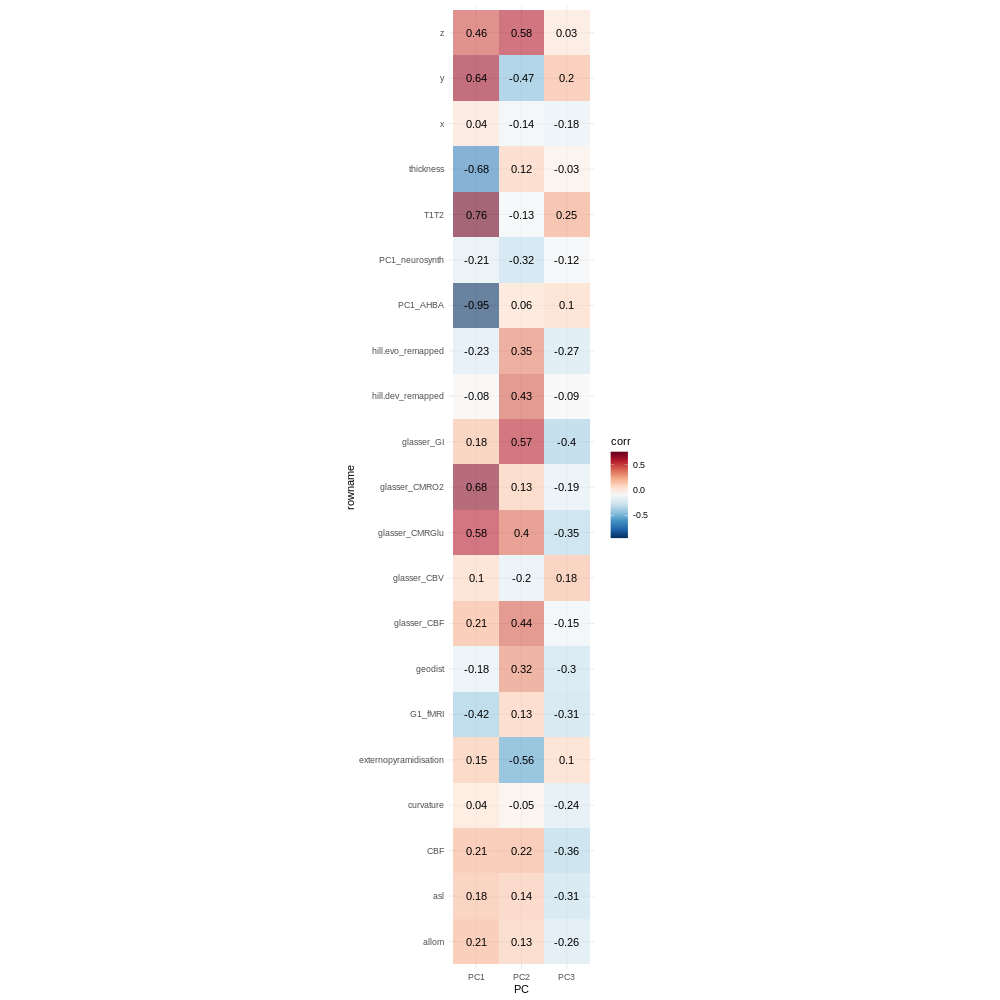

In [93]:
%%R -i corrs -w 1000 -h 1000
df <- corrs %>% 
rownames_to_column() %>%
gather(PC, corr, -rowname)


ggplot(df, aes(y=rowname, x=PC)) + 
geom_tile(aes(fill=corr), alpha=.6) +
geom_text(aes(label=round(corr,2))) +
scale_fill_gradientn(
    colors=rev(brewer.rdbu(100))) +
coord_equal() +
theme_minimal() #+ theme(aspect.ratio=1)

In [85]:
maps = maps_jakob.loc[:, spin_p_order.index]
maps

,G1_fMRI,T1T2,glasser_CMRGlu,PC1_AHBA,glasser_CMRO2,thickness,glasser_GI,glasser_CBF,hill.dev_remapped,CBF,...,asl,curvature,geodist,hill.evo_remapped,PC1_neurosynth,externopyramidisation,glasser_CBV,x,y,z
region,,,,,,,,,,,,,,,,,,,,,
V1,-0.750526,1.977036,1.231160,-2.359875,2.873226,-2.310289,-1.523300,2.068603,-0.275131,-0.179597,...,-0.085518,1.555901,-1.975811,-2.446501,0.261369,1.769126,2.293495,-1.255505,1.560962,-0.583163
MST,-1.042511,1.575121,0.017804,-0.667729,0.318382,-0.815568,-0.392062,-0.818263,0.246052,0.415531,...,0.263112,-0.905143,-0.100868,0.067569,-0.536989,0.630473,-0.273515,0.738100,1.155091,-0.203728
V6,-1.135492,1.647248,0.515730,-1.890494,1.291453,-1.721457,-0.755553,0.396488,-0.610757,-0.433862,...,-0.355929,-0.366673,-1.563375,-1.870358,0.056781,-1.006875,0.445668,-0.966524,1.438821,0.519752
V2,-0.933047,1.665496,0.871595,-2.073466,2.060033,-2.030079,-1.113092,1.188173,-0.614974,-0.156811,...,-0.267413,1.427644,-1.930489,-2.070317,0.056781,1.377546,2.718926,-1.142430,1.510433,-0.497031
V3,-0.953694,1.430449,0.480104,-1.969166,0.991689,-1.497054,-0.421922,0.244502,-0.479010,-0.268078,...,-0.302699,1.207608,-1.902737,-1.813154,0.056781,1.888340,1.801476,-0.879968,1.576216,-0.374542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STSva,1.434124,-0.795757,-1.356592,0.899926,-1.549051,0.205376,-0.482769,-2.081311,1.170922,-0.064344,...,0.071231,-1.014288,0.778556,1.189967,1.234535,1.400205,-0.442127,1.176556,-0.238875,-1.290717
TE1m,1.611986,-0.634758,-0.469423,0.713989,-1.006154,1.084687,0.461361,-1.224603,1.626480,1.361941,...,0.899422,1.246423,0.405919,1.581797,0.056781,-0.677230,-0.185135,1.884027,0.182489,-1.208325
PI,-0.607650,-1.391843,-2.885445,1.448596,-2.744273,-0.240927,-1.762716,-2.117425,-2.009474,-0.387085,...,-0.586942,-3.391453,0.297004,-0.268852,0.056781,-1.012710,2.077343,0.744796,-0.359852,-1.148027


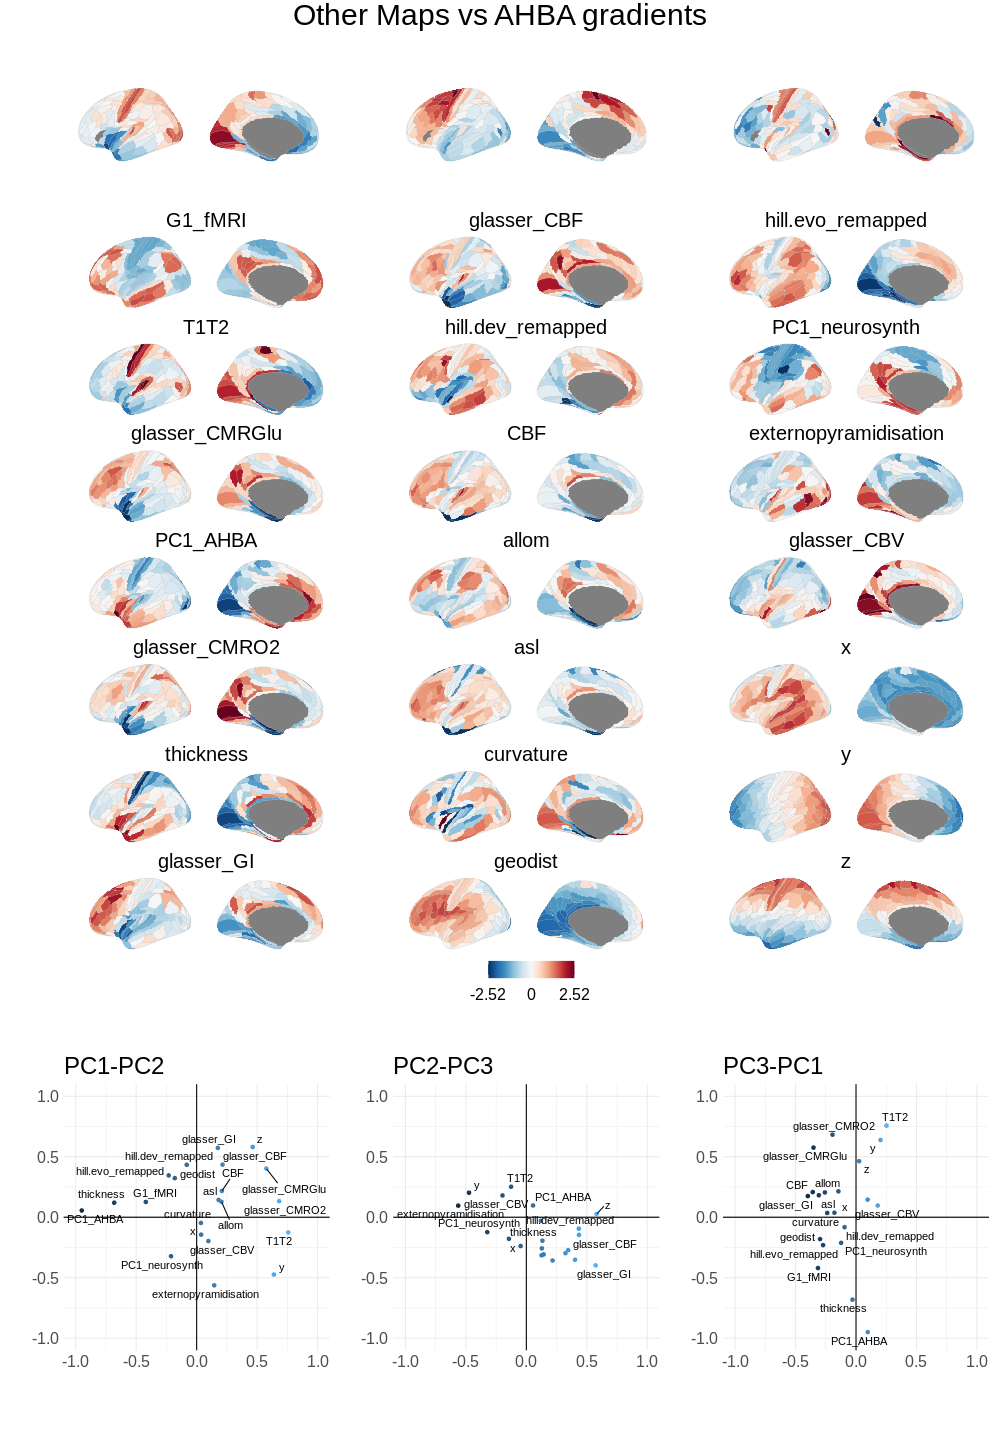

In [96]:
%%R -i maps -i corrs -i scores -w 1000 -h 1450
source("../code/plot_maps.R")
df <- corrs

plot_corrs_scatter <- function(df, PCa, PCb) {
    ggplot(df,aes(x={{PCa}}, y={{PCb}})) + 
    geom_hline(yintercept=0) + geom_vline(xintercept=0) + 
    xlab('') + ylab('') +
    geom_point(aes(color={{PCa}})) + 
    geom_text_repel(aes(label=rownames(df)), force=2) 
}

g1 <- plot_corrs_scatter(df, PC1, PC2) + ggtitle('PC1-PC2')
g2 <- plot_corrs_scatter(df, PC2, PC3) + ggtitle('PC2-PC3')
g3 <- plot_corrs_scatter(df, PC3, PC1) + ggtitle('PC3-PC1')

# lim <- max(df)
lim <- 1
g123 <- (g1 | g2 | g3) & 
      coord_cartesian(clip = "off") &
      guides(color=F) &
      xlim(c(-lim,lim)) & ylim(c(-lim,lim)) & 
      theme_minimal() & theme(aspect.ratio=1)
    
g0 <- plot_hcp_wide(scores) + guides(fill='none')

gx <- plot_maps(maps)

(
    (g0 / gx / g123) & theme(text=element_text(size=20))
) + plot_layout(heights=c(1,6,3)) + 
 plot_annotation(title = 'Other Maps vs AHBA gradients',
                theme = theme(plot.title = element_text(size = 30, hjust=.5)))

In [9]:
from netneurotools import freesurfer as nnsurf
from nibabel.freesurfer.io import read_annot

_,_,rh_names = read_annot("../data/rh.HCPMMP1.annot")

# spin_maps = nnsurf.spin_data(
#     data = np.array(maps_jakob),
#     drop = rh_names,
#     version = "fsaverage",
#     lhannot = "../data/lh.HCPMMP1.annot",
#     rhannot = "../data/rh.HCPMMP1.annot",
#     n_rotate = 1000
# )
# np.save('../outputs/spin_maps_1000.npy', spin_maps)
spin_maps_1000 = np.load("../outputs/spin_maps_1000.npy")

In [ ]:
# from netneurotools import freesurfer as nnsurf

# _,_,rh_names = read_annot("../data/rh.HCPMMP1.annot")

# spin_maps = nnsurf.spin_data(
#     data = np.array(maps_jakob),
#     drop = rh_names,
#     version = "fsaverage",
#     lhannot = "../data/lh.HCPMMP1.annot",
#     rhannot = "../data/rh.HCPMMP1.annot",
#     n_rotate = 10000
# )
# np.save('../outputs/spin_maps_10000.npy', spin_maps)

In [100]:
scores = hcp_base.score_from(hcp_3donors_ds8).iloc[:,:3]
spins_maps = spin_maps_1000

spin_corrs = {}
for m in range(spins_maps.shape[1]):
    spins = pd.DataFrame(spins_maps[:,m,:], index=list(range(1,181)))
    spin_corrs[maps_jakob.columns[m]] = pd.concat([scores, spins], axis=1).corr().iloc[3:,:3]
spin_corrs = pd.concat(spin_corrs).reset_index(level=0).set_axis(['map','PC1','PC2','PC3'],axis=1)

In [101]:
from scipy.stats import percentileofscore

spin_p = np.zeros(corrs.shape)
for m, _map in enumerate(corrs.index):
    for i in range(3):
        _spin_corrs = spin_corrs.set_index('map').loc[_map].iloc[:,i]
        _corr = corrs.iloc[m,i]
        p = percentileofscore(_spin_corrs, _corr)/100
        if p > .5:
            p = 1-p
        spin_p[m,i] = p

spin_p = pd.DataFrame(spin_p, index=corrs.index, columns=corrs.columns)

In [105]:
spin_p_order = (spin_p
                .apply(lambda x: x<.05)
                .sort_values(['PC1','PC2','PC3'], ascending=False)
               )

map_corrs_sig = (corrs
 .loc[spin_p_order.index]
 .round(2).astype('string')
 .where(spin_p > .05, other = lambda x: x+' *')
 .where(spin_p > .01, other = lambda x: x+'*')
 .where(spin_p > .001, other = lambda x: x+'*')
)
map_corrs_sig.to_csv("../outputs/map_corrs_sig.csv")
map_corrs_sig

,PC1,PC2,PC3
G1_fMRI,-0.42 *,0.13,-0.31 *
T1T2,0.76 ***,-0.13,0.25 *
glasser_CMRGlu,0.58 *,0.4,-0.35 **
PC1_AHBA,-0.95 ***,0.06,0.1
glasser_CMRO2,0.68 ***,0.13,-0.19
thickness,-0.68 ***,0.12,-0.03
glasser_GI,0.18,0.57 *,-0.4 **
glasser_CBF,0.21,0.44 *,-0.15
hill.dev_remapped,-0.08,0.43 **,-0.09
CBF,0.21,0.22,-0.36 *


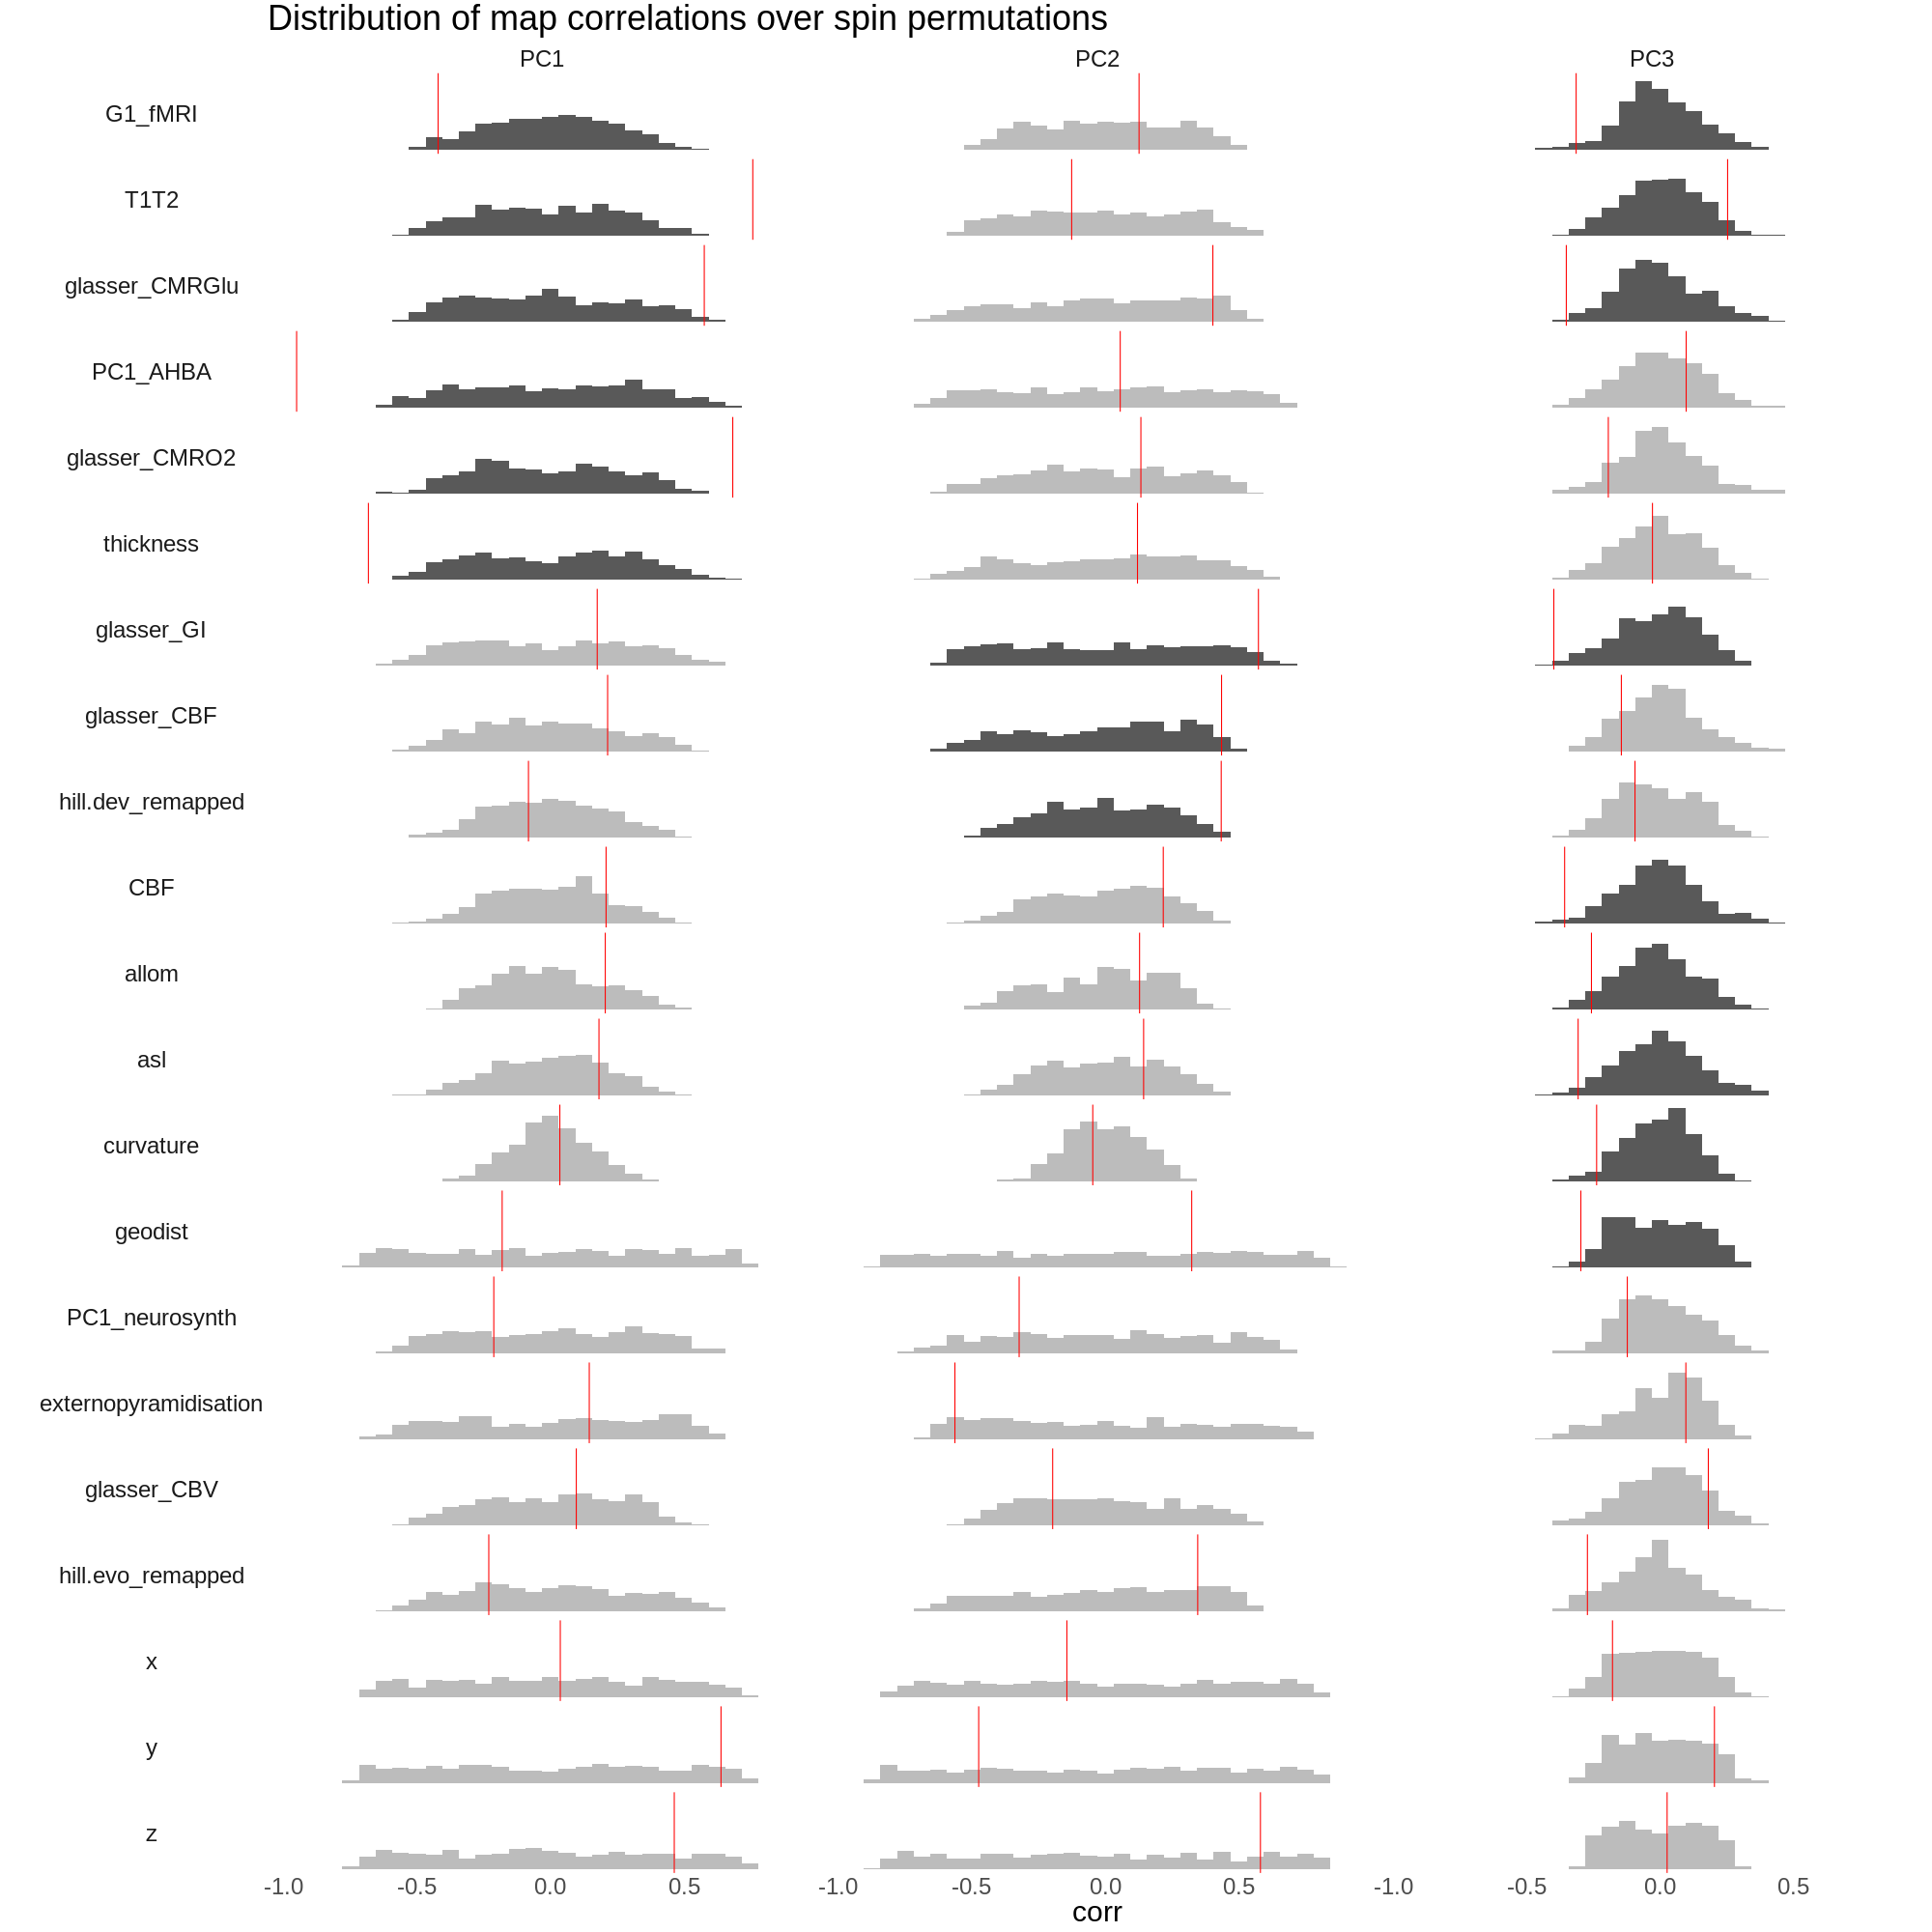

In [103]:
%%R -i spin_corrs -i corrs -i spin_p_order -w 2000 -h 2000
corrs <- corrs %>% rownames_to_column('map') %>% gather(pc, corr, -map)
sig <- spin_p_order %>% rownames_to_column('map') %>% gather(pc, sig, -map)

spin_corrs %>% 
gather(pc, corr, -map) %>%
left_join(sig, by = c('map', 'pc')) %>% 
ggplot() + 
facet_grid(factor(map, levels=rownames(spin_p_order))~pc, switch='y') +
geom_histogram(aes(corr, alpha=sig)) +
scale_alpha_manual(values=c(.4,1), guide='none') +
ylab('') +
geom_vline(data=corrs, aes(xintercept=corr), color='red') +
ggtitle('Distribution of map correlations over spin permutations') +
theme_minimal() + 
theme(strip.text.y.left = element_text(angle=0),
      panel.grid = element_blank(),
      axis.text.y = element_blank(),
      text = element_text(size=30)
     )